In [1]:
import torch
import sys
sys.path.append('../models/')
from alexnet import *
from densenet_201 import *
from mobilenet_v2 import *
from resnet_50 import *
from vgg_19 import *

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import norm
import tqdm
import torchattacks

In [3]:
sys.path.append('..')
from utils import *

In [4]:
block_size = 8
alpha = 0.1
beta = 1/255
target = torch.tensor([162]).cuda()

In [5]:
img = cv2.imread('../img/beagle.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = addborder(img,block_size)

In [6]:
wm = cv2.imread('../img/logo.jpg')
wm = cv2.cvtColor(wm,cv2.COLOR_BGR2RGB)


In [7]:
wm = cv2.resize(wm,dsize=(img.shape[1],img.shape[0]),fx=1,fy=1,interpolation=cv2.INTER_LINEAR)

In [8]:
T = transforms.ToTensor()

In [9]:
img = T(img).cuda()

In [10]:
wm = T(wm).cuda()

In [11]:
from fgsm import *

In [12]:
model = resnet50_IN()
model = model.cuda()
model = model.eval()

In [13]:
res = model(img.unsqueeze(0))

In [14]:
res.argmax()

tensor(162, device='cuda:0')

In [15]:
www,aaa = fgsm_wm(img,target,wm,model,alpha,beta,block_size)

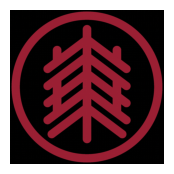

In [19]:
pltshow(www)

In [17]:
res = model(aaa.unsqueeze(0))

In [18]:
res.argmax()

tensor(166, device='cuda:0')